In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
import yfinance as yf

In [24]:
data = yf.download('NVDA',start='2023-10-15',end='2024-10-14')

[*********************100%***********************]  1 of 1 completed


In [25]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-16,45.063000,46.224998,44.911999,46.095001,46.081062,375099000
2023-10-17,44.000000,44.754002,42.480000,43.938000,43.924709,812333000
2023-10-18,42.591000,43.219002,41.825001,42.195999,42.183239,627294000
2023-10-19,42.811001,43.297001,41.882000,42.101002,42.088268,501233000
2023-10-20,41.889999,42.470001,41.077999,41.387001,41.374481,477266000


In [26]:
data.shape

(250, 6)

In [27]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [28]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,87.832988,89.509452,85.977968,87.854592,87.842636,4.228335e+08
std,30.175587,30.848896,29.330545,30.098380,30.099967,1.457245e+08
min,40.450001,40.879002,39.230000,40.326000,40.313805,1.702095e+08
25%,55.350251,56.562000,54.780002,56.135251,56.123206,3.181484e+08
50%,89.436501,90.640003,87.062500,88.876499,88.861599,4.024075e+08
75%,117.277498,119.590002,115.070000,117.014997,117.007490,4.944078e+08
max,139.800003,140.759995,133.660004,135.580002,135.568405,1.142269e+09


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-10-16 to 2024-10-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [30]:
data["Open-Close"] = data.Open - data.Close
data["High-Low"] = data.High - data.Low
data['Volume-Change'] = data.Volume.pct_change()

In [31]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Open-Close,0
High-Low,0
Volume-Change,1


In [32]:
data = data.dropna()

In [33]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Open-Close,0
High-Low,0
Volume-Change,0


In [34]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Volume-Change
Date,,,,,,,,,
2023-10-17,44.000000,44.754002,42.480000,43.938000,43.924709,812333000,0.062000,2.274002,1.165650
2023-10-18,42.591000,43.219002,41.825001,42.195999,42.183239,627294000,0.395000,1.394001,-0.227787
2023-10-19,42.811001,43.297001,41.882000,42.101002,42.088268,501233000,0.709999,1.415001,-0.200960
2023-10-20,41.889999,42.470001,41.077999,41.387001,41.374481,477266000,0.502998,1.392002,-0.047816
2023-10-23,41.229000,43.248001,40.945000,42.974998,42.962006,478530000,-1.745998,2.303001,0.002648


In [35]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open-Close', 'High-Low', 'Volume-Change']

In [36]:
X = data[features]
y = data.Close

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

In [49]:
print("MSE:",MSE)
print("R2:",R2)

MSE: 1.656902139770885e-22
R2: 1.0


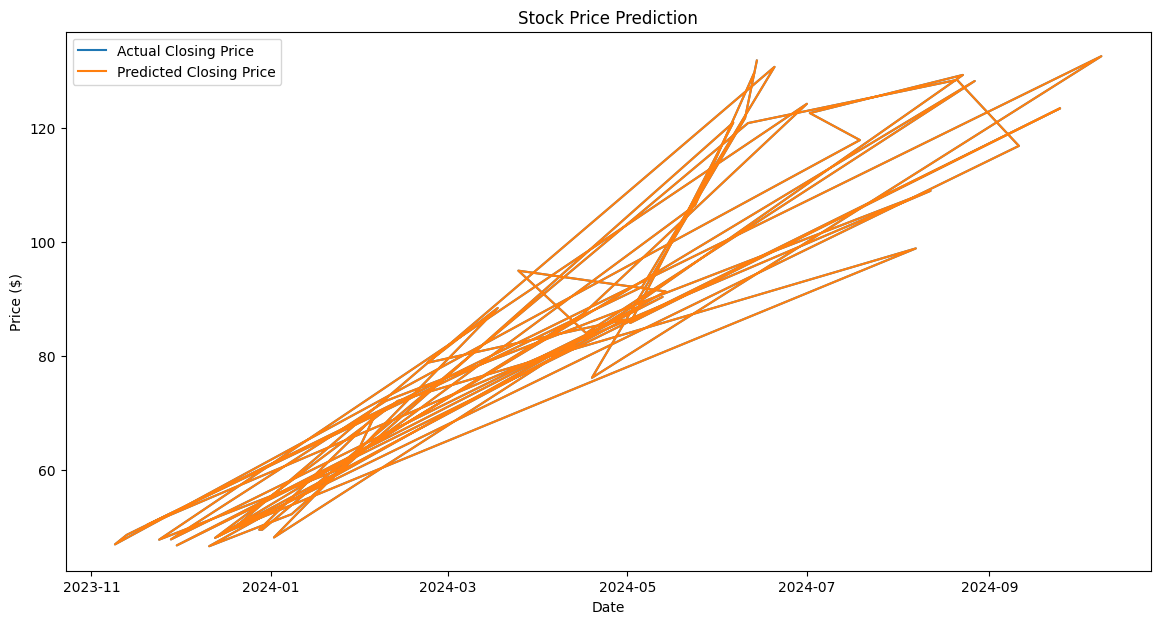

In [58]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Actual Closing Price')
plt.plot(y_test.index, y_pred, label='Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()